# Телеметрия декабрь 2020

In [1]:
!pwd
!date
!ls *.dat

/home/alena/SCIENCE/SIT/Analysis/Telemetry
Ср фев 10 14:34:54 MSK 2021
2020_12_29_all_dbg_params.dat  2021_02_part_all_dbg_params.dat
2020_12_all_dbg_params.dat


In [111]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from matplotlib import dates
import datetime as dt

In [167]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3.5
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 12

In [82]:
filename = "2020_12_all_dbg_params.dat"
data = pd.read_csv(filename, index_col=None, sep='\t')
data['time_old'] = data['time']
print(data.shape)
print(data.columns)
data.head()

(42986, 21)
Index(['year', 'month', 'day', 'time', 'P0', 'T0', 'P1', 'T1', 'Tmos', 'Umos',
       'Imos', 'Tpow', 'U5', 'Uac', 'Icom', 'Tbot', 'Ttop', 'Freq', 'Num',
       'flight', 'time_old'],
      dtype='object')


,year,month,day,time,P0,T0,P1,T1,Tmos,Umos,...,Tpow,U5,Uac,Icom,Tbot,Ttop,Freq,Num,flight,time_old
0,2020,11,29,03:51:20,96.15,24.5,96.03,-22.9,-12.4,0.0,...,34.00,5.15,18.92,0.89,21.9,21.7,NaN,1,1129,03:51:20
1,2020,11,29,03:51:21,96.15,24.5,96.02,-22.9,-12.4,0.0,...,34.00,5.15,18.92,0.89,21.9,21.7,NaN,2,1129,03:51:21
2,2020,11,29,03:52:22,96.15,24.5,96.02,-22.9,-12.4,0.0,...,34.00,5.15,18.91,1.00,21.9,21.8,NaN,3,1129,03:52:22
3,2020,11,29,03:53:23,96.14,24.5,96.02,-22.9,-12.4,0.0,...,34.25,5.15,18.92,0.95,21.9,21.7,NaN,4,1129,03:53:23
4,2020,11,29,03:54:24,96.15,24.5,96.01,-22.9,-12.4,0.0,...,34.00,5.16,18.92,0.89,22.1,21.7,NaN,5,1129,03:54:24


In [89]:
def shift_time(time, shift):
    hh = time[:2]
    mm = time[2:]
    if hh[1] == ':':
        hh = time[0]
        mm = time[1:]
    hh = (int(hh) + shift) % 24
    newtime = str(hh) + mm
    newtime = str(newtime)
    #print(time, hh) #, newtime)
    return newtime

shift_time('0:51:20',3)

'3:51:20'

In [93]:
data['time'] = data.apply(lambda row: shift_time(row['time_old'], 16), axis=1)
data.head()

,year,month,day,time,P0,T0,P1,T1,Tmos,Umos,...,Tpow,U5,Uac,Icom,Tbot,Ttop,Freq,Num,flight,time_old
0,2020,11,29,19:51:20,96.15,24.5,96.03,-22.9,-12.4,0.0,...,34.00,5.15,18.92,0.89,21.9,21.7,NaN,1,1129,03:51:20
1,2020,11,29,19:51:21,96.15,24.5,96.02,-22.9,-12.4,0.0,...,34.00,5.15,18.92,0.89,21.9,21.7,NaN,2,1129,03:51:21
2,2020,11,29,19:52:22,96.15,24.5,96.02,-22.9,-12.4,0.0,...,34.00,5.15,18.91,1.00,21.9,21.8,NaN,3,1129,03:52:22
3,2020,11,29,19:53:23,96.14,24.5,96.02,-22.9,-12.4,0.0,...,34.25,5.15,18.92,0.95,21.9,21.7,NaN,4,1129,03:53:23
4,2020,11,29,19:54:24,96.15,24.5,96.01,-22.9,-12.4,0.0,...,34.00,5.16,18.92,0.89,22.1,21.7,NaN,5,1129,03:54:24


## Plot

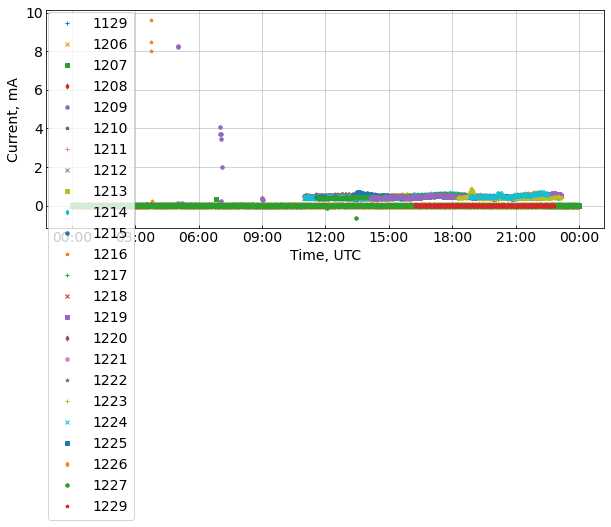

In [94]:
def plot_by_days(array, param, axistext, titletext='', axis=None):
    plcol = ['+','x', 's', 'd', 'o', '*']

    data = array
    if param == 'Tmos':
        data = array[(array[param] < 50)]

    if axis == None:
        fig, ax = plt.subplots(figsize=(10,4))
    else:
        fig, ax = axis

    i = 0
    for key, grp in data.groupby(['flight']):
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        ax.plot(x, y, plcol[i%len(plcol)], label=key)
        i += 1

    plt.xlabel("Time, UTC")
    plt.ylabel(axistext)
    fmt = dates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(fmt)
    ax.set_title(titletext)
    plt.legend(borderaxespad=0.1)
    plt.grid()
    #plt.savefig("sit_current_2020_12.png", dpi=300,  bbox_inches='tight')
    
plot_by_days(data, "Imos", "Current, mA")    

## Plot shared axis

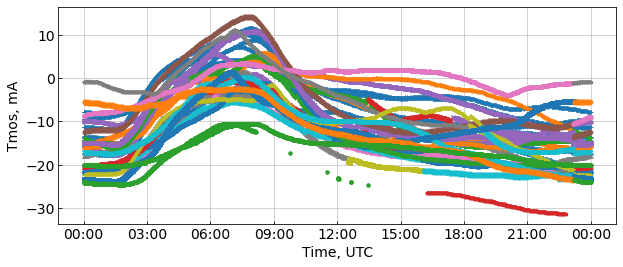

In [95]:
def plot_by_days(array, param, axistext, titletext='', axis=None):
    plcol = ['+','x', 's', 'd', 'o', '*']

    data = array
    if param == 'Tmos':
        data = array[(array[param] < 50)]

    if axis == None:
        fig, ax = plt.subplots(figsize=(10,4))
    else:
        ax = axis

    i = 0
    for key, grp in data.groupby(['flight']):
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        ax.plot(x, y, plcol[i%len(plcol)], label=str(int(key)))
        i += 1

    plt.xlabel("Time, UTC")
    ax.set_ylabel(axistext)
    fmt = dates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(fmt)
    ax.set_title(titletext)
    #ax.legend(borderaxespad=0.1)
    ax.grid()
    #plt.savefig("sit_current_2020_12.png", dpi=300,  bbox_inches='tight')
    
plot_by_days(data, "Tmos", "Tmos, mA")    

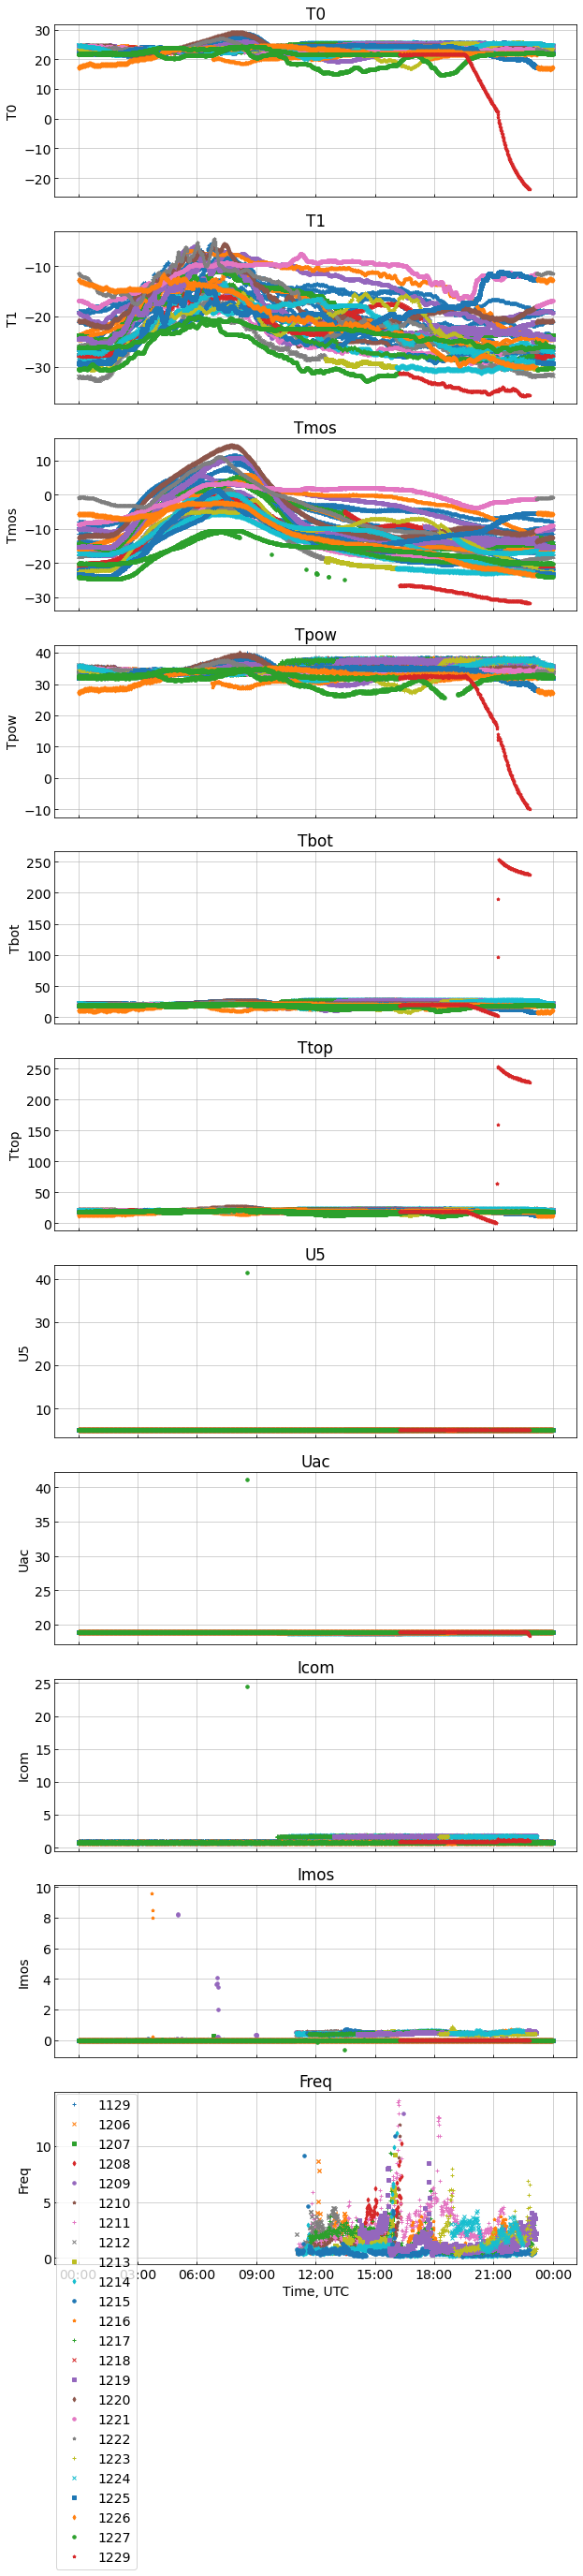

In [96]:
params = data.columns[4:-2]
params = ['T0', 'T1', 'Tmos', 'Tpow', 'Tbot', 'Ttop', 'U5', 'Uac', 'Icom', 'Imos','Freq']
figs = len(params)
fig, axn = plt.subplots(figs, 1, sharex=True,  figsize=(10, 4*figs))

for i, param in enumerate(params):
    plot_by_days(data, param, param, param, axn[i]) 
plt.legend(borderaxespad=0.1)
#plt.savefig("2020_12_sit_telemetry.png", dpi=300,  bbox_inches='tight')

## Ток и темп счета

1129
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1229


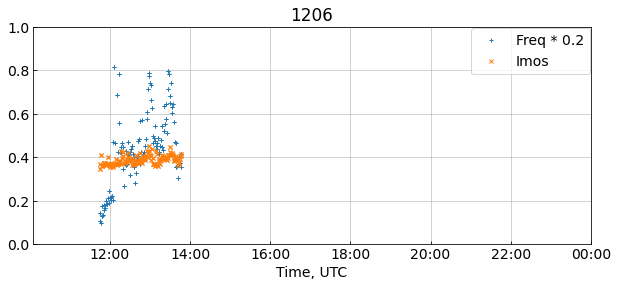

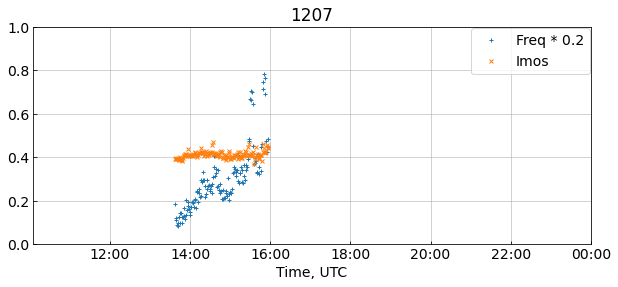

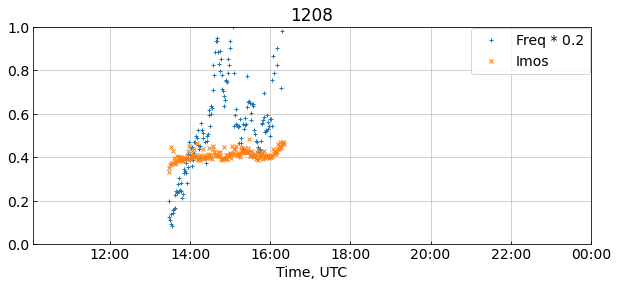

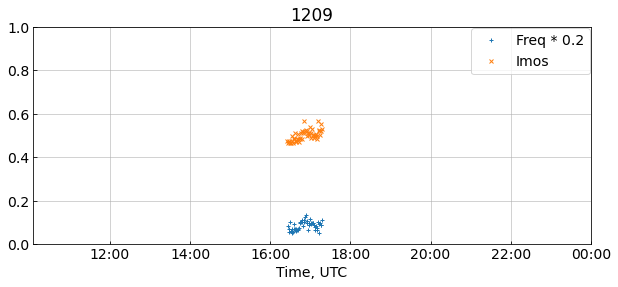

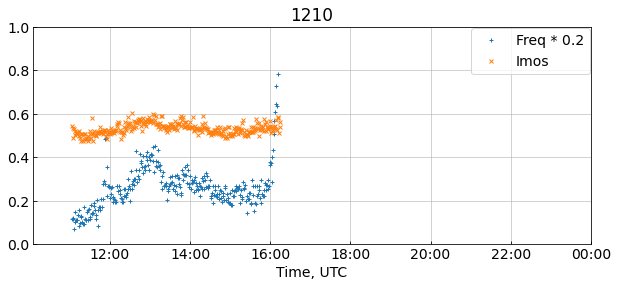

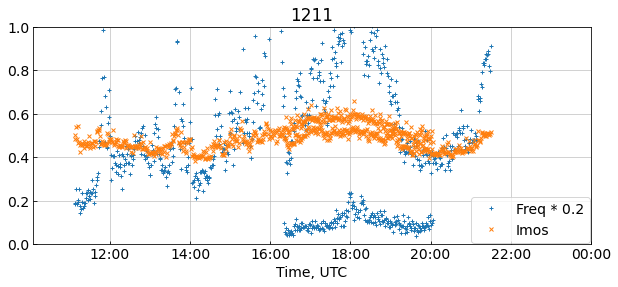

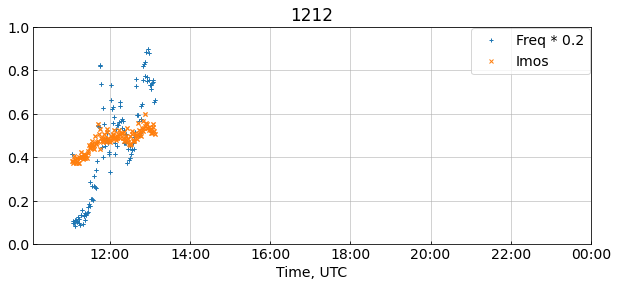

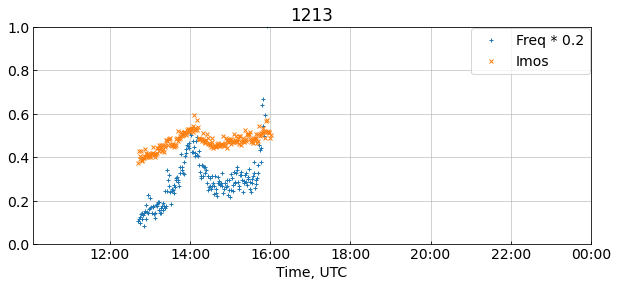

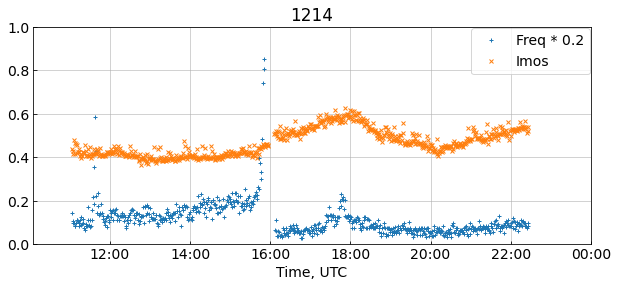

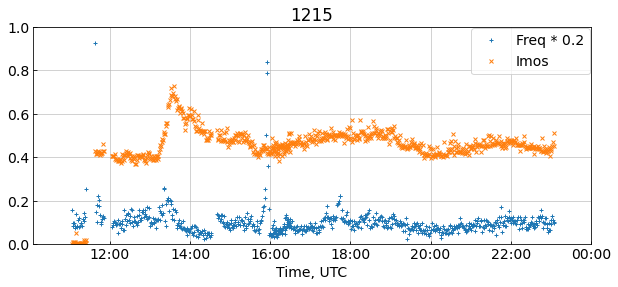

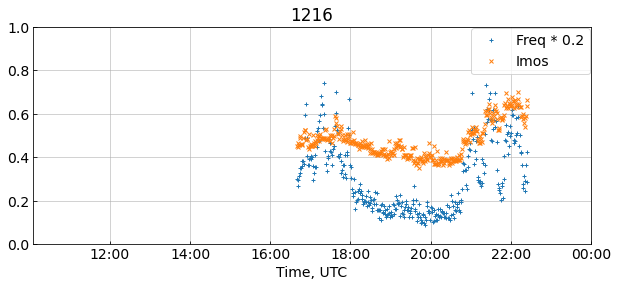

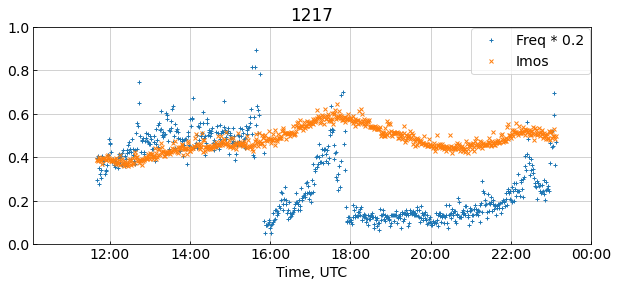

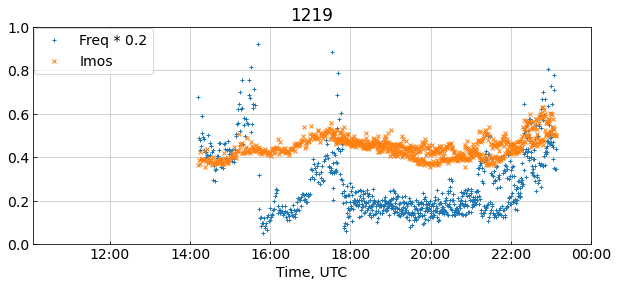

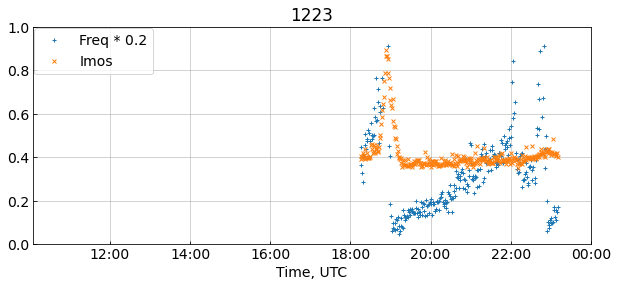

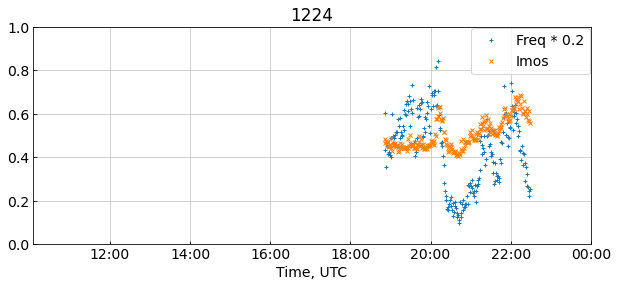

In [166]:
def plot_freq_for_days(array, flight, axistext, titletext='', axis=None):
    fmt = dates.DateFormatter('%H:%M')
    plcol = ['+','x', 's', 'd', 'o', '*']
    #plcol = ['+-','x-', 's-', 'd-', 'o-', '*-']
    #plcol = ['m+','bx', 'gs', 'rd', 'co', 'y*']
    #plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-', 'k*-']

    grp = array[array.flight == flight]
    grp = grp[(np.isnan(grp.Freq)) == False]
    x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
    if(len(x) == 0):
        return
    
    #print(flight)
    
    fig, ax = plt.subplots(figsize=(10,4))
    FreqCoef = 0.2
    i = 0
    for param in ['Freq', 'Imos']:
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        label=param
        if param == 'Freq':
            y *= FreqCoef
            label = param + ' * ' + str(FreqCoef)
        ax.plot(x, y, plcol[i%len(plcol)], label=label)
        i += 1

    plt.xlabel("Time, UTC")
    plt.ylabel(axistext)
    ax.xaxis.set_major_formatter(fmt)
    titletext = str(int(titletext))
    ax.set_title(titletext)
    plt.ylim(0., 1)
    #print(ax.get_xlim())
    #ax.set_xlim(np.array([-0.1, 0.1])+ax.get_xlim())
    ax.set_xlim((693596.42,693597))
    
    plt.legend(borderaxespad=0.1)
    plt.grid()
    #plt.savefig("Temperature_2020_" + titletext + ".png", dpi=300,  bbox_inches='tight')
    

for key, grp in (data.groupby(['flight'])):
    print(key)
    plot_freq_for_days(grp, key, "", key)

In [144]:
flights = [1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 
           1216, 1217, 1219, 1223, 1224]

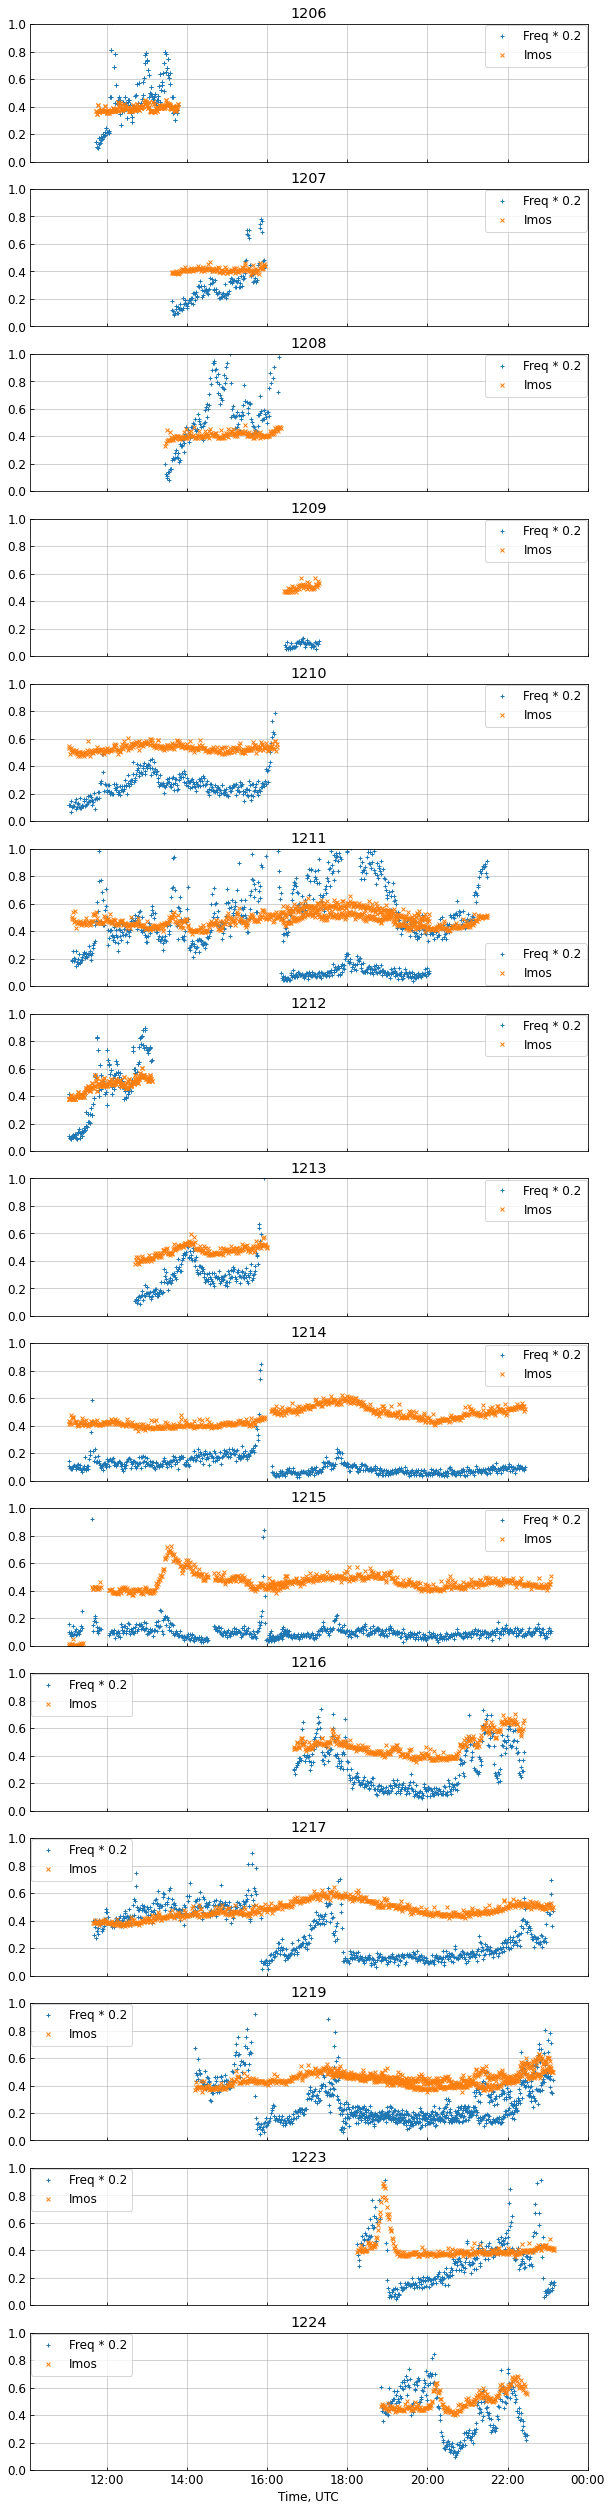

In [169]:
def plot_freq_and_imos_for_days(array, flight, axistext, titletext='', axis=None):
    fmt = dates.DateFormatter('%H:%M')
    plcol = ['+','x', 's', 'd', 'o', '*']

    grp = array[array.flight == flight]
    grp = grp[(np.isnan(grp.Freq)) == False]
    x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
    if(len(x) == 0):
        return
    
    if axis == None:
        fig, ax = plt.subplots(figsize=(10,4))
    else:
        ax = axis
    
    FreqCoef = 0.2
    i = 0
    for param in ['Freq', 'Imos']:
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        label=param
        if param == 'Freq':
            y *= FreqCoef
            label = param + ' * ' + str(FreqCoef)
        ax.plot(x, y, plcol[i%len(plcol)], label=label)
        i += 1

    #ax.set_xlabel("Time, UTC")
    ax.set_ylabel(axistext)
    ax.xaxis.set_major_formatter(fmt)
    titletext = str(int(titletext))
    ax.set_title(titletext)
    ax.set_ylim(0., 1)
    ax.set_xlim((693596.42,693597))    
    ax.legend(borderaxespad=0.1)
    ax.grid()


########################    
flights = [1206, 1207, 1208, 1209, 1210, 
           1211, 1212, 1213, 1214, 1215, 
           1216, 1217, 1219, 1223, 1224] 
figs = len(flights)
fig, axn = plt.subplots(figs, 1, sharex=True,  figsize=(10, 3 * figs))

for i, key in enumerate(flights):
    plot_freq_and_imos_for_days(data, key, "", key, axn[i])
plt.xlabel("Time, UTC")
plt.savefig("2020_12_curr_and_freq.png", dpi=300,  bbox_inches='tight')